# **Curso** : Python para Data Science

**Sesión 08**
Aprendizaje Supervisado - Clasificación

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe

In [117]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB

In [118]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
from sklearn import datasets
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Ahora haremos una búsqueda de hiperparámetros usando Grid Search
from sklearn.metrics import accuracy_score,recall_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc


# libraries to deploy the ML model
import os
import joblib
import gradio as gr

# Caso de Churn de Telecomunicaciones

https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

**Contexto:**
"Predecir el comportamiento para retener clientes. Puedes analizar todos los datos relevantes de los clientes y desarrollar programas enfocados en la retención de clientes."

**Contenido:**
Se utilizará el Conjunto de Datos de Deserción de Orange Telecom, que consta de datos de actividad de clientes limpiados (características), junto con una etiqueta de deserción que especifica si un cliente canceló la suscripción, para desarrollar modelos predictivos.


Cada fila representa a un cliente; cada columna contiene atributos del cliente. Los conjuntos de datos tienen las siguientes atributos o características:

* State: string
* Account length: integer
* Area code: integer
* International plan: string
* Voice mail plan: string
* Number vmail messages: integer
* Total day minutes: double
* Total day calls: integer
* Total day charge: double
* Total eve minutes: double
* Total eve calls: integer
* Total eve charge: double
* Total night minutes: double
* Total night calls: integer
* Total night charge: double
* Total intl minutes: double
* Total intl calls: integer
* Total intl charge: double
* Customer service calls: integer
* Churn: string

## **1. Lectura Inicial de base de datos**

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/churn_telco.csv')
#data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/INNHotelsGroup.csv')

In [31]:
data.sample(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1113,IA,152,415,387-6716,no,no,0,206.3,98,35.07,...,82,24.89,43.7,121,1.97,10.6,4,2.86,1,False.
1774,NY,21,415,335-2274,no,no,0,244.7,81,41.60,...,117,14.28,281.5,87,12.67,6.6,1,1.78,1,False.
107,NM,93,510,383-4361,no,yes,21,117.9,131,20.04,...,115,13.98,217.0,86,9.76,9.8,3,2.65,1,False.
1354,WI,105,408,406-2213,no,no,0,147.7,103,25.11,...,78,18.93,163.5,102,7.36,12.8,3,3.46,2,False.
2521,PA,137,415,365-1664,no,no,0,215.9,76,36.70,...,118,12.36,186.9,129,8.41,12.1,4,3.27,1,False.


In [32]:
data.shape

(3333, 21)

In [33]:
data['Churn?'].value_counts()

Churn?
False.    2850
True.      483
Name: count, dtype: int64

In [34]:
# Vemos la proporción de True y False
data['Churn?'].value_counts(normalize=True)*100

Churn?
False.    85.508551
True.     14.491449
Name: proportion, dtype: float64

## **2. Análisis Exploratorio de los datos**

In [35]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area Code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
Phone,3333,3333,382-4657,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Int'l Plan,3333,2,no,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Plan,3333,2,no,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Message,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Day Mins,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Day Calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Day Charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64


In [36]:
#Visualizamos datos perdidos
data.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [37]:
#Visualizamos los tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [38]:
#Descriptivo Univariado. Columnas categóricas aquellas que tienen menos de 5 valores únicos

columns_cat = []
for column in data.columns:
    if data[column].nunique() <=5 and column!="Churn?":
        columns_cat.append(column)

In [39]:
columns_cat

['Area Code', "Int'l Plan", 'VMail Plan']

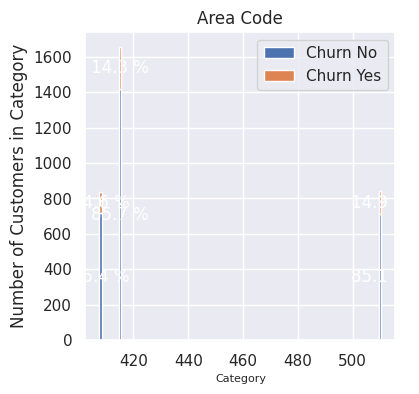

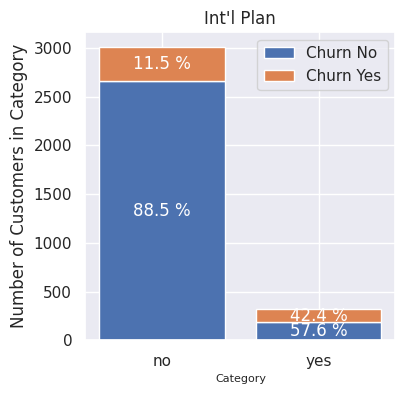

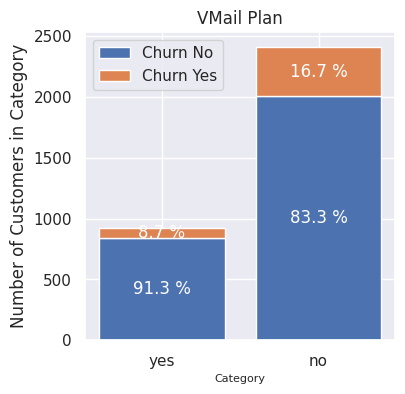

In [40]:
#Visualizamos la distribución bivarida de las columnas categóricas
desarrll2 = data.dropna()
for cat in columns_cat:
    fig, ax = plt.subplots(figsize = (4,4))
    loan_yes = []
    loan_no = []
    x = []
    for i in desarrll2[cat].unique():
        #each category has a sub-category: e.g. Gender category has male and female
        #looping through each subcategory and adding churn and no churn data to list
        loan_yes.append(desarrll2.groupby([cat, 'Churn?']).size()[i][0])
        loan_no.append(desarrll2.groupby([cat, 'Churn?']).size()[i][1])
        x.append(i)

    p1 = plt.bar(x, loan_yes)
    p2 = plt.bar(x, loan_no, bottom=loan_yes)

    #Plotting the bar labels inside the bars, as percentage
    for r1, r2, in zip(p1, p2):
        height1 = r1.get_height()
        height2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., #x
                 height1 / 2., #y
                 f'{round(height1 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)
        plt.text(r2.get_x() + r2.get_width() / 2., #x
                 height1 + height2 / 2., #y
                 f'{round(height2 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)

    plt.xlabel('Category', fontsize=8)
    plt.ylabel('Number of Customers in Category', fontsize=12)
    plt.legend(['Churn No','Churn Yes'])
    plt.title(cat, fontsize=12)
    plt.show()


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [42]:
cols_num = ['VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']

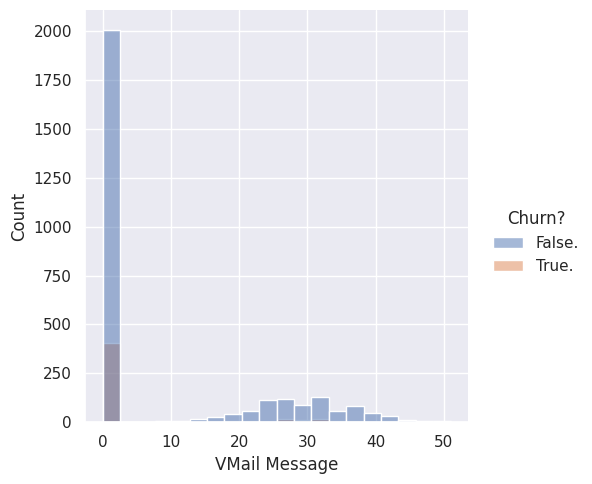

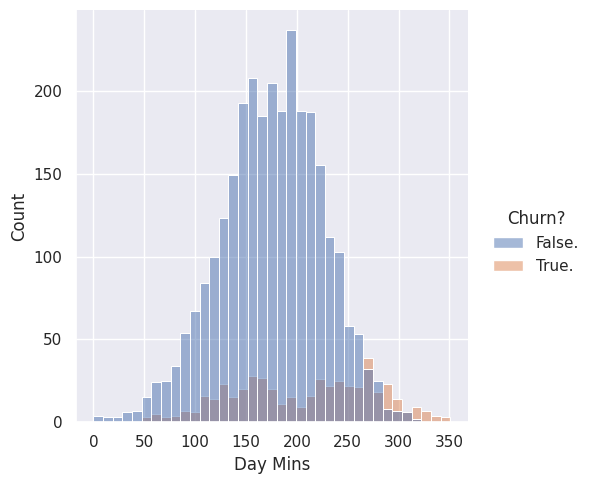

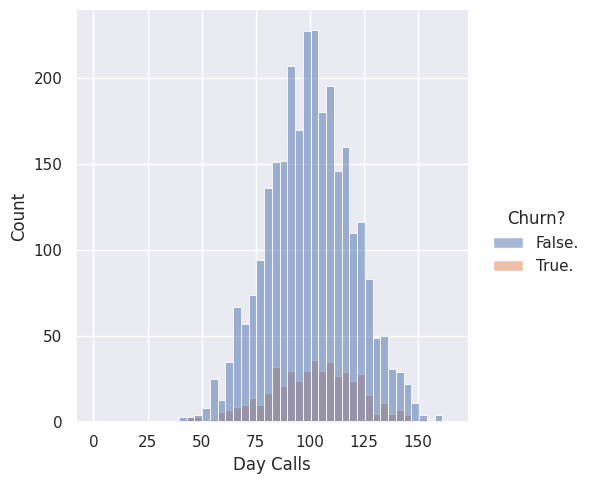

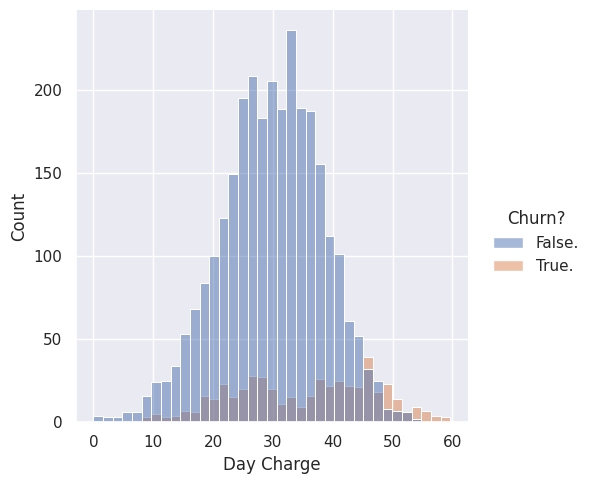

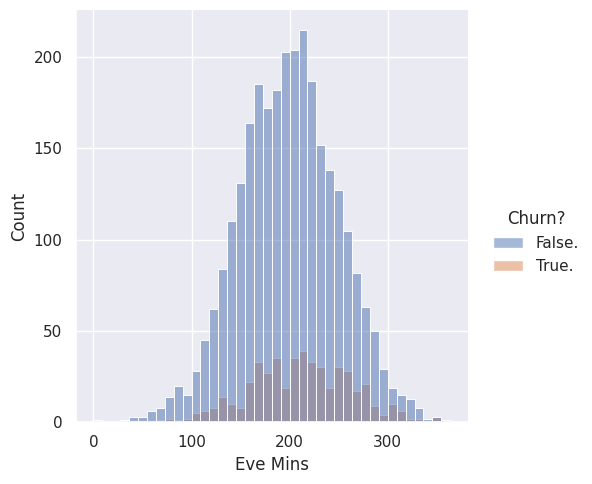

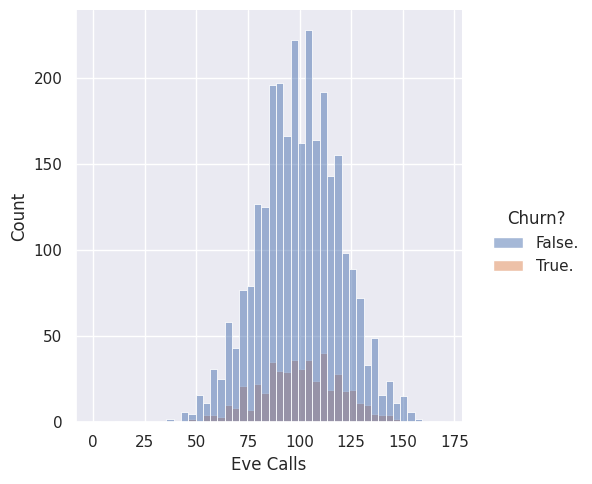

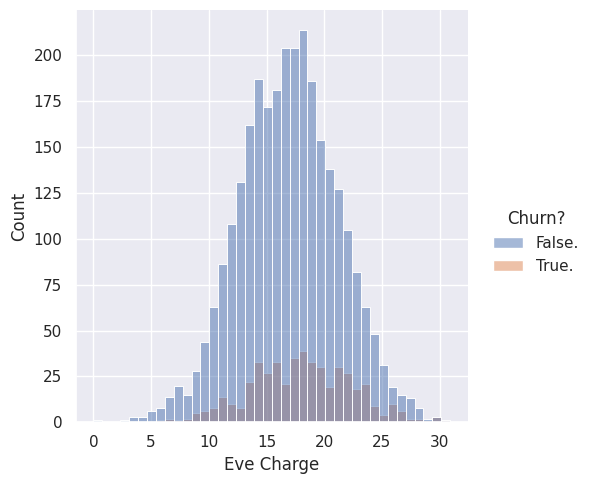

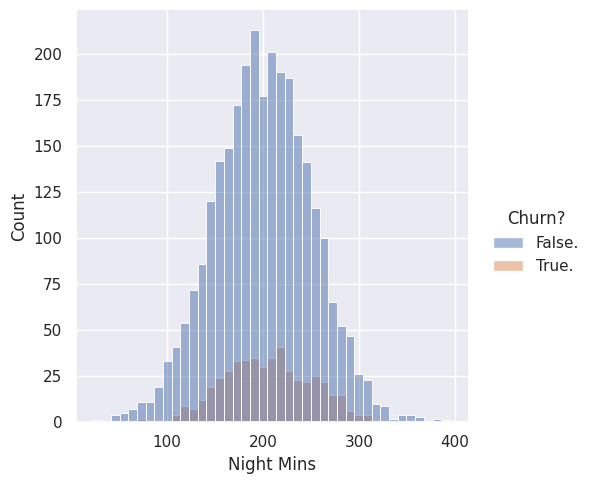

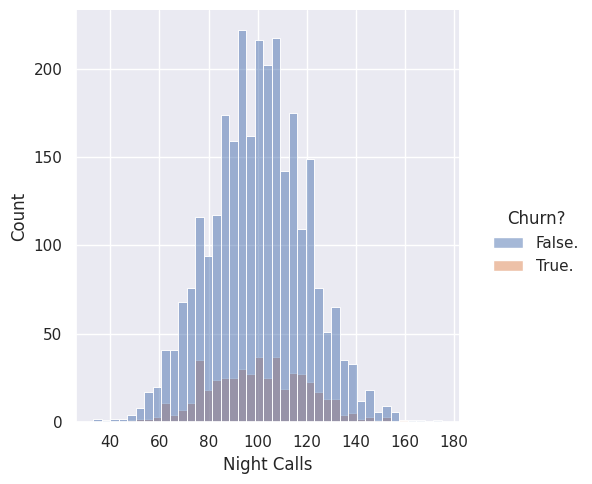

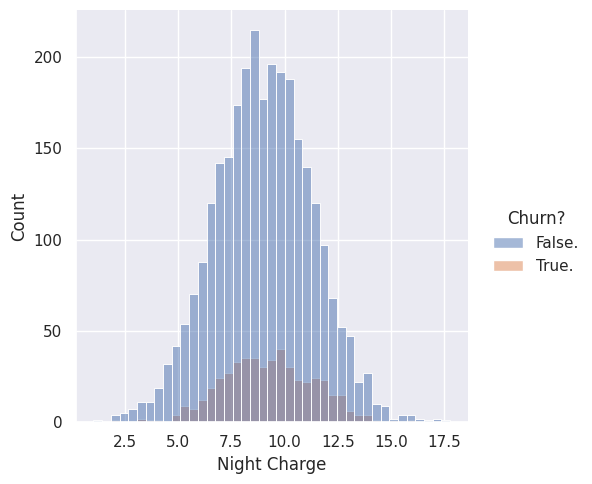

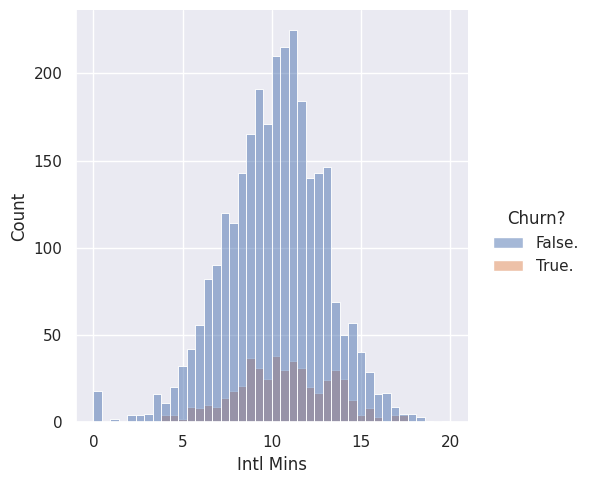

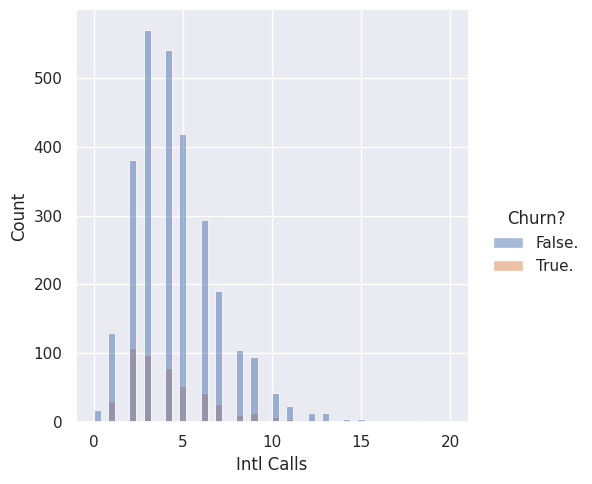

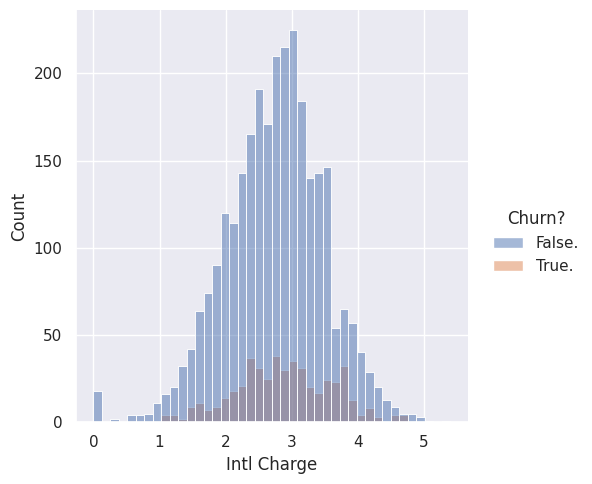

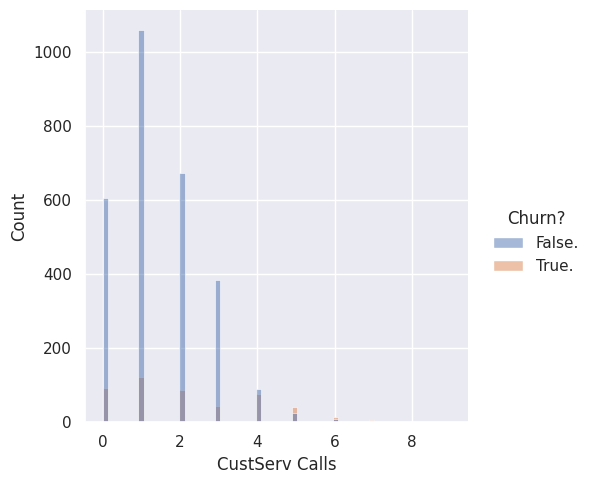

In [43]:
for col in cols_num:
    sns.displot(data, x=col, hue="Churn?")

## **3. Tratamientos o Recodificacion de variables**

In [44]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [45]:
data.loc[data["Int'l Plan"]=='no',"Int'l Plan"] = 0
data.loc[data["Int'l Plan"]=='yes',"Int'l Plan"] = 1

data.loc[data["VMail Plan"]=='no',"VMail Plan"] = 0
data.loc[data["VMail Plan"]=='yes',"VMail Plan"] = 1

data.loc[data['Churn?']=='False.','Churn?'] = 0
data.loc[data['Churn?']=='True.','Churn?'] = 1

data['Churn?'] = data['Churn?'].astype('int')

In [46]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## **5. Modelamiento de Datos o Creación del Algoritmo de ML**

In [47]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [48]:
# Separamos los datos en X (predictores) y Y (target o variable a predecir)

X = data.iloc[:,4 :-1].values
y = data.iloc[:, -1].values

In [123]:
data.iloc[:,4 :-1]

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [49]:
len(X), len(y)

(3333, 3333)

In [50]:
# Dividimos los datos en train y test (30% para test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [51]:
X_train

array([[0, 0, 0, ..., 0, 0.0, 4],
       [1, 1, 12, ..., 7, 3.32, 2],
       [0, 0, 0, ..., 4, 4.48, 2],
       ...,
       [1, 0, 0, ..., 2, 3.0, 1],
       [0, 0, 0, ..., 3, 2.67, 3],
       [1, 0, 0, ..., 2, 4.56, 5]], dtype=object)

In [52]:
# Una buena práctica es estandarizar los valores. Usaremos standart scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
def evaluar_modelo(model):
  #Paso 1: Crear clasificador
  classifier = model

  #Paso 2: Entrenar
  classifier.fit(X_train, y_train)

  #Paso 3: Predice en Train y Test
  y_pred_test = classifier.predict(X_test)
  y_pred_train = classifier.predict(X_train)

  #Paso 4: Evaluamos en Train y Test
  print('Reporte de Clasificación en Train')
  print('-'*60)
  print(classification_report(y_train, y_pred_train))
  print('')
  print('Reporte de Clasificación en Test')
  print('-'*60)
  print(classification_report(y_test, y_pred_test))

  print(confusion_matrix(y_test, y_pred_test))

  # Accuracy score
  from sklearn.metrics import accuracy_score
  print('')
  print('Accuracy en Train',accuracy_score(y_pred_train,y_train))
  print('Accuracy en Test',accuracy_score(y_pred_test,y_test))
  print('')

  print('Recall en Train (Clase Positiva):', recall_score(y_train, y_pred_train, pos_label=1))
  print('Recall en Test (Clase Positiva):', recall_score(y_test, y_pred_test, pos_label=1))


# Calcular la curva ROC
def curva_roc(model):
  y_score = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)

  # Mostrar la curva ROC
  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Aleatorio')
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()

  print("Valor de AUC-ROC:", roc_auc)

## 1. Support Vector Machine

In [61]:
from sklearn.svm import SVC

svc_model = SVC()
evaluar_modelo(svc_model)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1988
           1       0.97      0.68      0.80       345

    accuracy                           0.95      2333
   macro avg       0.96      0.84      0.89      2333
weighted avg       0.95      0.95      0.95      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       862
           1       0.93      0.56      0.70       138

    accuracy                           0.93      1000
   macro avg       0.93      0.78      0.83      1000
weighted avg       0.93      0.93      0.93      1000

[[856   6]
 [ 61  77]]

Accuracy en Train 0.949849978568367
Accuracy en Test 0.933

Recall en Train (Clase Positiva): 0.6811594202898551
Recall en Test (Cla

In [55]:
# Definir la grilla con parámetros
model = SVC(probability=True)


param_grid_svc = {
    'C': [0.1, 1, 10, 100,200],  # Valores para el hiperparámetro de regularización C
    'kernel': ['rbf', 'poly'],  # Tipo de kernel
}

# Definir la estrategia de validación cruzada estratificada de 5 folds
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV con los parámetros y la métrica F1
grid_search_svc = GridSearchCV(estimator=model, param_grid=param_grid_svc, scoring='f1', cv=cv_strat, n_jobs=-1)
grid_search_svc.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 200],
                         'kernel': ['rbf', 'poly']},
             scoring='f1')

In [56]:
# Mostrar los mejores resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search_svc.best_params_)


# Mostrar el mejor modelo encontrado
best_model_svc = grid_search_svc.best_estimator_
best_model_svc


Mejores hiperparámetros encontrados:
{'C': 200, 'kernel': 'rbf'}


SVC(C=200, probability=True)

In [62]:
evaluar_modelo(best_model_svc)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.98      0.99       345

    accuracy                           1.00      2333
   macro avg       1.00      0.99      0.99      2333
weighted avg       1.00      1.00      1.00      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       862
           1       0.58      0.67      0.62       138

    accuracy                           0.89      1000
   macro avg       0.76      0.79      0.78      1000
weighted avg       0.89      0.89      0.89      1000

[[795  67]
 [ 46  92]]

Accuracy en Train 0.997428204029147
Accuracy en Test 0.887

Recall en Train (Clase Positiva): 0.9826086956521739
Recall en Test (Cla

In [63]:
# Obtener las probabilidades predichas para la clase positiva
y_score_svc = best_model_svc.predict_proba(X_test)[:, 1]

In [64]:
best_model_svc

SVC(C=200, probability=True)

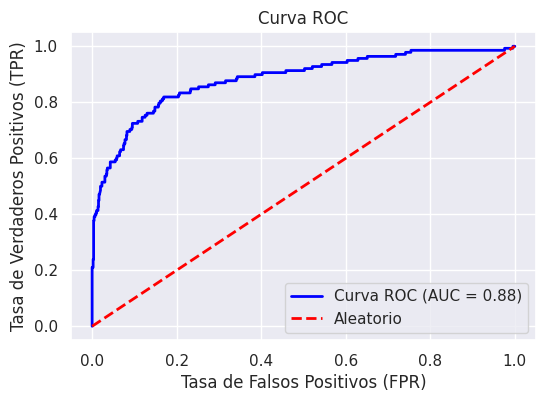

Valor de AUC-ROC: 0.8829230976159252


In [69]:
curva_roc(best_model_svc)

## K-Nearest Neighbours

In [70]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()

evaluar_modelo(classifier_knn)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1988
           1       0.92      0.52      0.67       345

    accuracy                           0.92      2333
   macro avg       0.92      0.76      0.81      2333
weighted avg       0.92      0.92      0.91      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       862
           1       0.85      0.37      0.52       138

    accuracy                           0.90      1000
   macro avg       0.88      0.68      0.73      1000
weighted avg       0.90      0.90      0.89      1000

[[853   9]
 [ 87  51]]

Accuracy en Train 0.9232747535362195
Accuracy en Test 0.904

Recall en Train (Clase Positiva): 0.5246376811594203
Recall en Test (Cl

In [83]:
# Definir el modelo KNN
knn = KNeighborsClassifier()


param_grid_knn = {
    'n_neighbors': [3,4, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos
    'metric': ['euclidean', 'manhattan'],  # Métrica de distancia

}

# Definir la función de puntuación personalizada para el AUC-ROC
#scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Crear una métrica personalizada para optimizar el recall de la clase positiva
positive_class = 1  # Clase positiva (puedes cambiar esto según tu caso)
scorer = make_scorer(recall_score, pos_label=positive_class)

# Configurar GridSearchCV con los parámetros
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring=scorer, cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search_knn.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=1))

In [84]:
print("Mejores hiperparámetros encontrados:")
print(grid_search_knn.best_params_)

Mejores hiperparámetros encontrados:
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


In [85]:
# Mostrar el mejor modelo encontrado en términos de accuracy
best_model_knn = grid_search_knn.best_estimator_
best_model_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')

In [86]:
evaluar_modelo(best_model_knn)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      1.00      1.00       345

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       862
           1       0.77      0.45      0.57       138

    accuracy                           0.91      1000
   macro avg       0.84      0.71      0.76      1000
weighted avg       0.90      0.91      0.89      1000

[[843  19]
 [ 76  62]]

Accuracy en Train 1.0
Accuracy en Test 0.905

Recall en Train (Clase Positiva): 1.0
Recall en Test (Clase Positiva): 0.4492753623188

In [87]:
# Obtener las probabilidades predichas para la clase positiva
y_score_knn = best_model_knn.predict_proba(X_test)[:, 1]

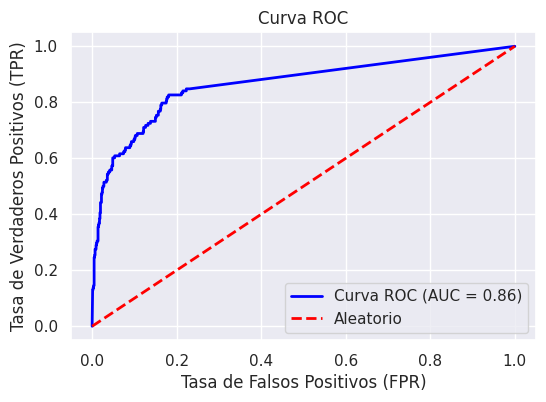

Valor de AUC-ROC: 0.8644414741585125


In [88]:
curva_roc(best_model_knn)

## Decision Tree's

In [89]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

evaluar_modelo(classifier)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      1.00      1.00       345

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       862
           1       0.65      0.78      0.71       138

    accuracy                           0.91      1000
   macro avg       0.81      0.86      0.83      1000
weighted avg       0.92      0.91      0.92      1000

[[804  58]
 [ 30 108]]

Accuracy en Train 1.0
Accuracy en Test 0.912

Recall en Train (Clase Positiva): 1.0
Recall en Test (Clase Positiva): 0.7826086956521

In [100]:
classifier = DecisionTreeClassifier(max_depth=6)

evaluar_modelo(classifier)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1988
           1       0.95      0.80      0.87       345

    accuracy                           0.96      2333
   macro avg       0.96      0.90      0.92      2333
weighted avg       0.96      0.96      0.96      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       862
           1       0.82      0.75      0.78       138

    accuracy                           0.94      1000
   macro avg       0.89      0.86      0.88      1000
weighted avg       0.94      0.94      0.94      1000

[[839  23]
 [ 34 104]]

Accuracy en Train 0.9635662237462495
Accuracy en Test 0.943

Recall en Train (Clase Positiva): 0.8
Recall en Test (Clase Positiva): 

In [101]:
# Definir el modelo Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Definir la grilla con parámetros
param_grid_tree = {
    'max_depth': [4, 5, 6, 10],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en una hoja
}

# Configurar GridSearchCV con los parámetros
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, scoring=scorer, cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search_tree.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring=make_scorer(recall_score, pos_label=1))

In [102]:
# Mostrar los mejores resultados y el mejor modelo en términos de accuracy
print("Mejores hiperparámetros encontrados:")
print(grid_search_tree.best_params_)


Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [103]:
# Mostrar el mejor modelo encontrado en términos de accuracy
best_model_tree = grid_search_tree.best_estimator_
best_model_tree

DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)

In [104]:
evaluar_modelo(best_model_tree)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1988
           1       0.89      0.87      0.88       345

    accuracy                           0.97      2333
   macro avg       0.94      0.93      0.93      2333
weighted avg       0.96      0.97      0.97      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       862
           1       0.73      0.78      0.75       138

    accuracy                           0.93      1000
   macro avg       0.85      0.87      0.86      1000
weighted avg       0.93      0.93      0.93      1000

[[823  39]
 [ 31 107]]

Accuracy en Train 0.9652807543934848
Accuracy en Test 0.93

Recall en Train (Clase Positiva): 0.8695652173913043
Recall en Test (Cla

In [105]:
# Obtener las probabilidades predichas para la clase positiva
y_score_dt = best_model_tree.predict_proba(X_test)[:, 1]

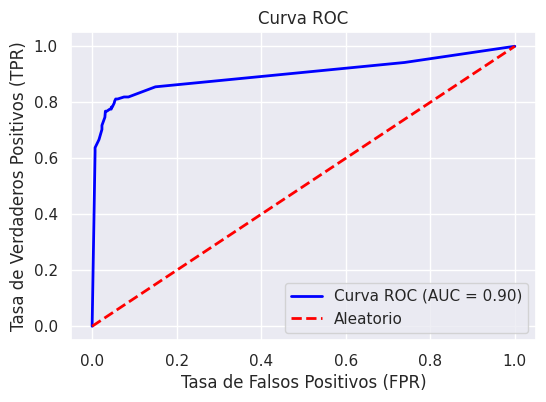

Valor de AUC-ROC: 0.8989962675274892


In [106]:
curva_roc(best_model_tree)

## Random Forest

In [107]:
## Modelos Supervisados : Random Forest ##
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=10,n_estimators=200,max_features=8,random_state=123)

evaluar_modelo(classifier)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1988
           1       1.00      0.87      0.93       345

    accuracy                           0.98      2333
   macro avg       0.99      0.94      0.96      2333
weighted avg       0.98      0.98      0.98      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       862
           1       0.88      0.79      0.83       138

    accuracy                           0.96      1000
   macro avg       0.92      0.89      0.90      1000
weighted avg       0.95      0.96      0.96      1000

[[847  15]
 [ 29 109]]

Accuracy en Train 0.9811401628804115
Accuracy en Test 0.956

Recall en Train (Clase Positiva): 0.8724637681159421
Recall en Test (Cl

In [108]:
# Definir el modelo Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Definir la grilla con parámetros
param_grid_forest = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10, 15],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en una hoja
    'max_features': ['sqrt', 'log2']  # Número máximo de características a considerar para dividir un nodo
}

# Configurar GridSearchCV con los parámetros
grid_search_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_forest, scoring='accuracy', cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search_forest.fit(X, y)

KeyboardInterrupt: 

In [ ]:
# Mostrar los mejores resultados y el mejor modelo en términos de accuracy
print("Mejores hiperparámetros encontrados:")
print(grid_search_forest.best_params_)
print("Exactitud (accuracy) del mejor modelo en el conjunto de datos de validación:")
print(grid_search_forest.best_score_)

Mejores hiperparámetros encontrados:
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Exactitud (accuracy) del mejor modelo en el conjunto de datos de validación:
0.9573992283137711


In [ ]:
# Mostrar el mejor modelo encontrado en términos de accuracy
best_model_forest = grid_search_forest.best_estimator_
best_model_forest

RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [109]:
best_model_forest = RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [ ]:
# Best RF
#RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [110]:
evaluar_modelo(best_model_forest)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1988
           1       1.00      0.89      0.94       345

    accuracy                           0.98      2333
   macro avg       0.99      0.95      0.97      2333
weighted avg       0.98      0.98      0.98      2333


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       862
           1       0.92      0.79      0.85       138

    accuracy                           0.96      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.96      0.96      0.96      1000

[[852  10]
 [ 29 109]]

Accuracy en Train 0.9841405915130733
Accuracy en Test 0.961

Recall en Train (Clase Positiva): 0.8927536231884058
Recall en Test (Cl

In [111]:
# Obtener las probabilidades predichas para la clase positiva
y_score_rf = best_model_forest.predict_proba(X_test)[:, 1]

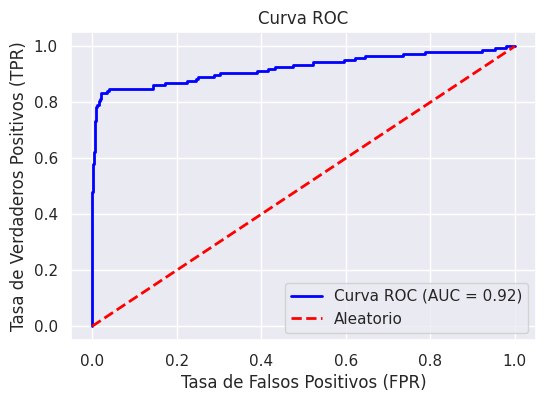

Valor de AUC-ROC: 0.9228117959581694


In [112]:
curva_roc(best_model_forest)

Text(0.5, 0, 'Relative Importance')

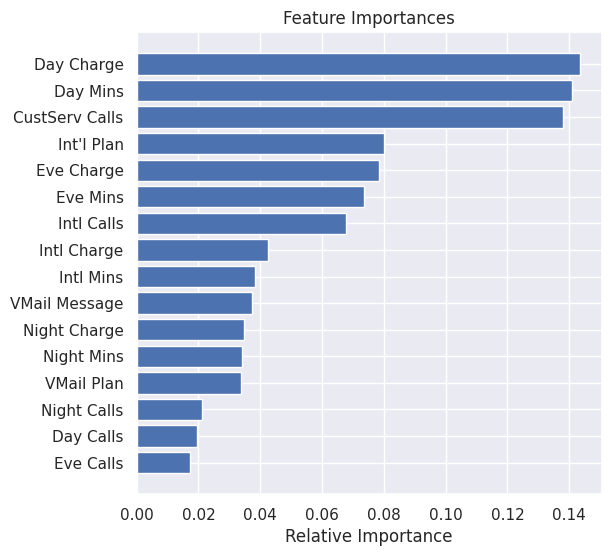

In [113]:
features=data.iloc[:,4 :-1].columns
importances = classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(6, 6))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

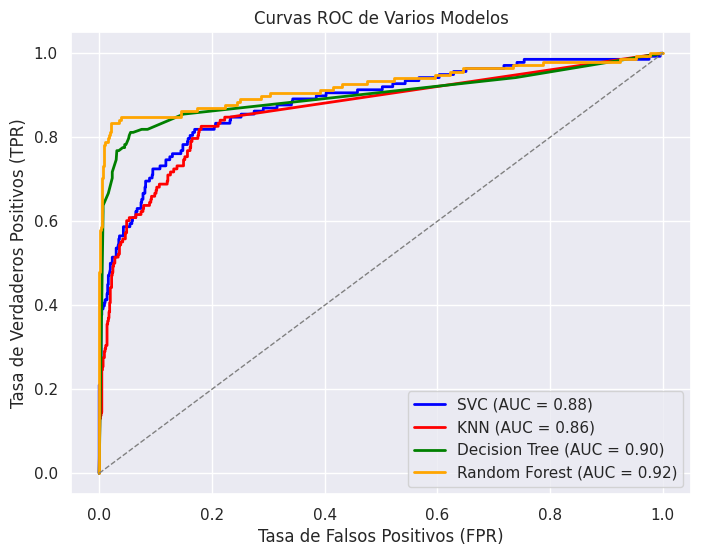

In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas para cada modelo

y_score_svc = best_model_svc.predict_proba(X_test)[:, 1]
y_score_knn = best_model_knn.predict_proba(X_test)[:, 1]
y_score_tree = best_model_tree.predict_proba(X_test)[:, 1]
y_score_forest = best_model_forest.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC para cada modelo

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_score_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Mostrar todas las curvas ROC en una sola gráfica
plt.figure(figsize=(8, 6))

plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, color='orange', lw=2, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de Varios Modelos')
plt.legend(loc='lower right')
plt.show()

# Model Deployment and Monitoring

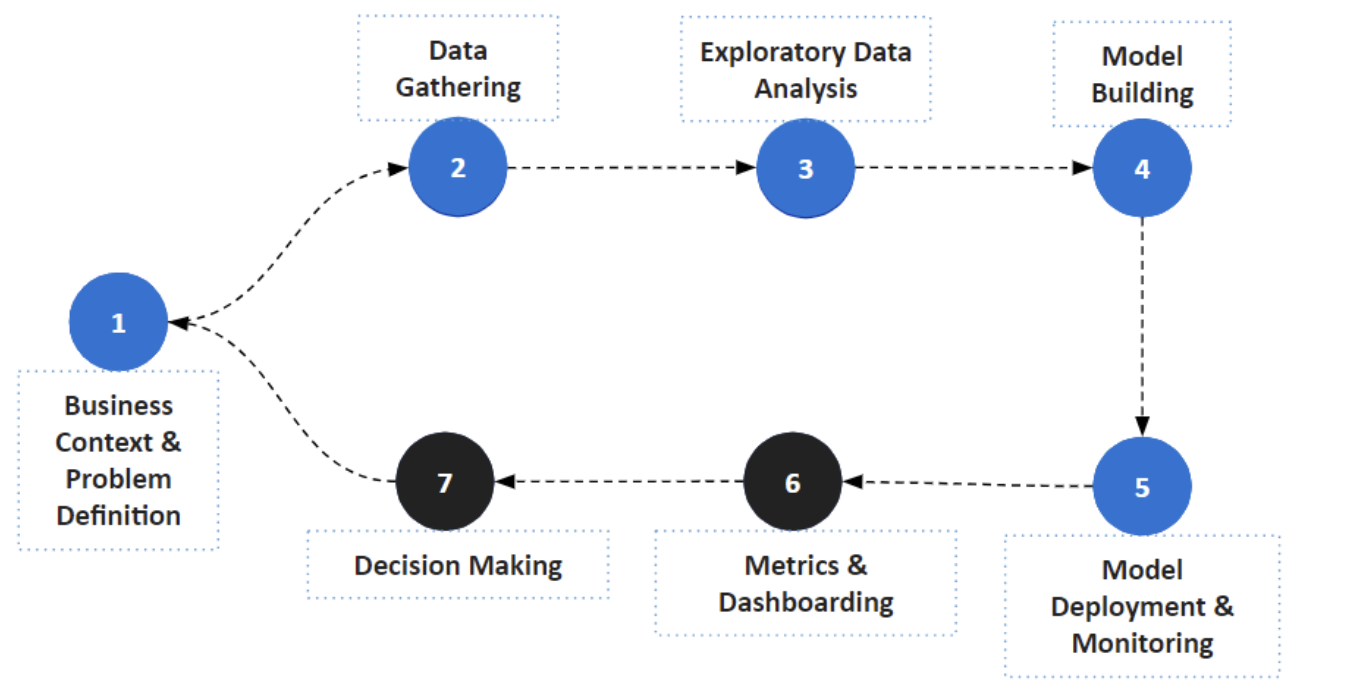

Una vez que el modelo ha sido construido y probado, es hora de ponerlo en acción. El despliegue del modelo es como lanzar un coche para la producción y uso público. En esta etapa, se expone el modelo y se prepara para hacer predicciones y apoyar la toma de decisiones.

El despliegue del modelo ayuda en lo siguiente:

1. **Realización de Valor**: El despliegue del modelo es necesario para obtener valor de la solución de Ciencia de Datos desarrollada. Al desplegar el modelo en un entorno de producción, las empresas pueden aprovechar sus capacidades para automatizar procesos, hacer predicciones, proporcionar recomendaciones o generar insights.

2. **Escalabilidad y Eficiencia**: Desplegar un modelo permite la escalabilidad y eficiencia en el manejo de grandes volúmenes de datos y la realización de predicciones o procesamiento de solicitudes en tiempo real. El modelo puede integrarse en sistemas o aplicaciones existentes, permitiendo una toma de decisiones automatizada y fluida a gran escala. El despliegue asegura que la solución de Ciencia de Datos pueda manejar eficazmente las demandas del entorno operativo.

3. **Aprendizaje Continuo y Mejora**: El despliegue del modelo facilita la recopilación de datos del mundo real, que pueden usarse para monitorear el rendimiento del modelo y recopilar retroalimentación. Al monitorear continuamente la salida del modelo y recopilar retroalimentación de los usuarios, las organizaciones pueden mejorar iterativamente el modelo, aumentar su precisión y adaptarlo a condiciones cambiantes. El despliegue permite el aprendizaje continuo y el refinamiento de la solución de Ciencia de Datos.

4. **Impacto Empresarial y Apoyo a la Toma de Decisiones**: Los modelos desplegados proporcionan valiosos insights y predicciones que apoyan los procesos de toma de decisiones. Al integrar la Ciencia de Datos en las operaciones comerciales, las organizaciones pueden aprovechar las salidas del modelo para tomar decisiones informadas, optimizar procesos, mejorar la experiencia del cliente y ganar una ventaja competitiva. El despliegue del modelo permite la utilización práctica de la Ciencia de Datos para generar impacto empresarial.

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
# exporting the final model to the disk
joblib.dump(best_model_forest, '/content/drive/MyDrive/Python for Data Science/churn_RF_model_001.joblib')

['/content/drive/MyDrive/Python for Data Science/churn_RF_model_001.joblib']

In [121]:
# Carcgar el modelo
churn_predictor = joblib.load('/content/drive/MyDrive/Python for Data Science/churn_RF_model_001.joblib')

In [124]:
data.iloc[:,4 :-1].columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [125]:
# define a function that will take the necessary inputs and make predictions

def predict_cancellation(Int_Plan, VMail_Plan, VMail_Message, Day_Mins, Day_Calls,Day_Charge, Eve_Mins, Eve_Calls, Eve_Charge, Night_Mins,Night_Calls, Night_Charge, Intl_Mins, Intl_Calls, Intl_Charge,CustServ_Calls):

    input_data = {
        'Int_Plan': Int_Plan,
        'VMail_Plan': VMail_Plan,
        'VMail_Message': VMail_Message,
        'Day_Mins': Day_Mins,
        'Day_Calls': Day_Calls,
        'Day_Charge': Day_Charge,
        'Eve_Mins': Eve_Mins,
        'Eve_Calls': Eve_Calls,
        'Eve_Charge': Eve_Charge,
        'Night_Mins':Night_Mins,
        'Night_Calls':Night_Calls,
        'Night_Charge':Night_Charge,
        'Intl_Mins':Intl_Mins,
        'Intl_Calls':Intl_Calls,
        'Intl_Charge':Intl_Charge,
        'CustServ_Calls':CustServ_Calls
    }

    # create a dataframe using the dictionary of inputs
    data_point = pd.DataFrame([input_data])

    # predicting the output and probability of the output
    prediction = churn_predictor.predict(data_point).tolist()
    prediction_prob = np.round(100*churn_predictor.predict_proba(data_point)[0][0], 2) if prediction == 1 else np.round(100*churn_predictor.predict_proba(data_point)[0][1], 2)

    # returning the final output
    return ("Yes", str(prediction_prob)+"%") if prediction[0] == 1 else ("No", str(prediction_prob)+"%")

In [126]:
data.iloc[:,4 :-1]

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [128]:
# creating the deployment input interface
model_inputs = [
    gr.Number(label="Int_Plan"),
    gr.Number(label="VMail_Plan"),
    gr.Number(label="VMail_Message"),
    gr.Number(label="Day_Mins"),
    gr.Number(label="Day_Calls"),
    gr.Number(label="Day_Charge"),
    gr.Number(label="Eve_Mins"),
    gr.Number(label="Eve_Calls"),
    gr.Number(label="Eve_Charge"),
    gr.Number(label="Night_Mins"),
    gr.Number(label="Night_Calls"),
    gr.Number(label="Night_Charge"),
    gr.Number(label="Intl_Mins"),
    gr.Number(label="Intl_Calls"),
    gr.Number(label="Intl_Charge"),
    gr.Number(label="CustServ_Calls"),
]

# creating the deployment output interface
model_outputs = [
    gr.Textbox(label="Will the user churn?"),
    gr.Textbox(label="Chances of Churn")
]

In [134]:
# defining the structure of the deployment interface and how the components will interact
demo = gr.Interface(
    fn = predict_cancellation,
    inputs = model_inputs,
    outputs = model_outputs,
    allow_flagging='never',
    title = "User Churn Predictor",
    description = "This interface will predict whether a user will churn or not.",
)

In [ ]:
# deploying the model
demo.launch(inline=False, share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1bc546663b6d401ea1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without

In [132]:
# shutting down the deployed model
demo.close()

Closing server running on port: 7860
